# Student Admission — Logistic Regression with Simple EDA

In [1]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

csv_path = "student_admission_dataset.csv"
df = pd.read_csv(csv_path)
df.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [2]:
# EDA tables
num_cols = ['GPA','SAT_Score','Extracurricular_Activities']
summary_stats = df[num_cols].describe().T
missing_pct = df.isna().mean().mul(100).round(2).rename('missing_%').to_frame()
class_counts = df['Admission_Status'].value_counts(dropna=False)
class_share  = df['Admission_Status'].value_counts(normalize=True, dropna=False).mul(100).round(2)
class_balance = pd.DataFrame({'count': class_counts, 'percent': class_share})
summary_stats, missing_pct, class_balance

(                            count        mean         std    min      25%  \
 GPA                         250.0     3.23832    0.438607    2.5     2.85   
 SAT_Score                   250.0  1250.43200  204.733163  900.0  1080.25   
 Extracurricular_Activities  250.0     5.20400    2.964716    0.0     3.00   
 
                                 50%      75%     max  
 GPA                            3.23     3.59     4.0  
 SAT_Score                   1237.00  1426.00  1598.0  
 Extracurricular_Activities     5.00     7.75    10.0  ,
                             missing_%
 GPA                               0.0
 SAT_Score                         0.0
 Extracurricular_Activities        0.0
 Admission_Status                  0.0,
                   count  percent
 Admission_Status                
 Waitlisted           88     35.2
 Rejected             81     32.4
 Accepted             81     32.4)

In [3]:
# Binary target
df['admitted'] = (df['Admission_Status'].str.strip().str.lower() == 'accepted').astype(int)
df[['Admission_Status','admitted']].head()

,Admission_Status,admitted
0,Rejected,0
1,Rejected,0
2,Rejected,0
3,Accepted,1
4,Accepted,1


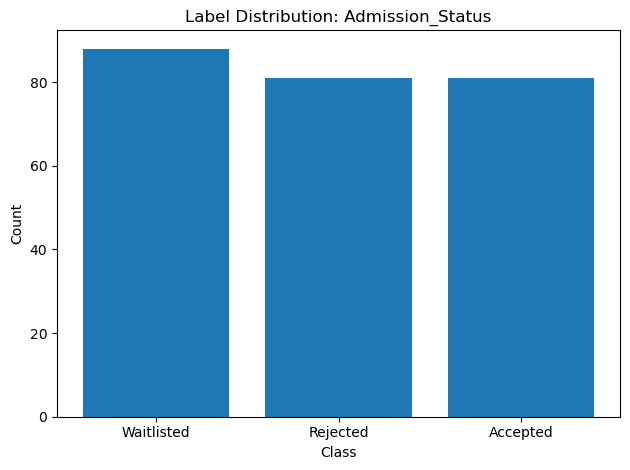

In [4]:
# Plot: label distribution
plt.figure()
counts = df['Admission_Status'].value_counts(dropna=False)
plt.bar(counts.index.astype(str), counts.values)
plt.title('Label Distribution: Admission_Status')
plt.xlabel('Class'); plt.ylabel('Count')
plt.tight_layout(); plt.show()

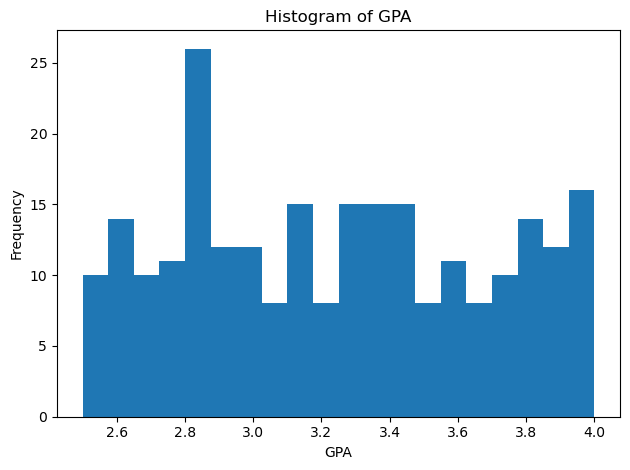

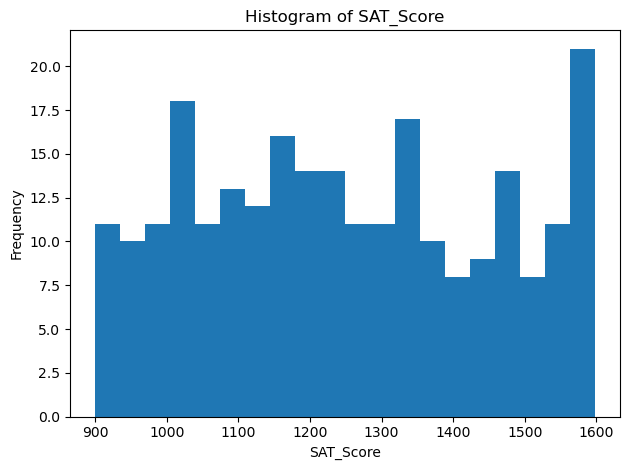

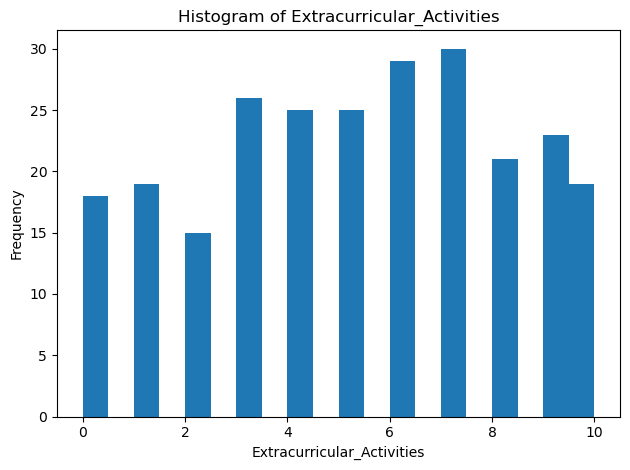

In [5]:
# Histograms
for col in ['GPA','SAT_Score','Extracurricular_Activities']:
    plt.figure()
    plt.hist(df[col].dropna().values, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col); plt.ylabel('Frequency')
    plt.tight_layout(); plt.show()

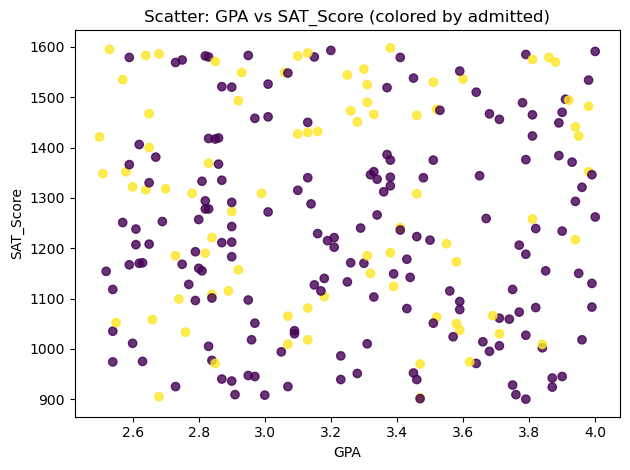

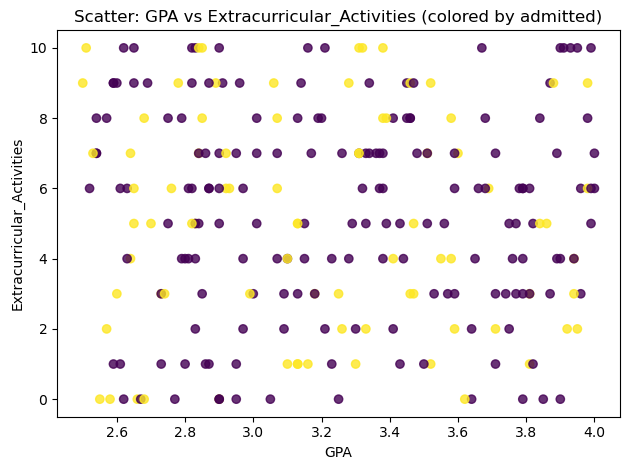

In [6]:
# Scatter plots colored by target
plt.figure()
plt.scatter(df['GPA'].values, df['SAT_Score'].values, c=df['admitted'].values, alpha=0.8)
plt.title('Scatter: GPA vs SAT_Score (colored by admitted)')
plt.xlabel('GPA'); plt.ylabel('SAT_Score')
plt.tight_layout(); plt.show()

plt.figure()
plt.scatter(df['GPA'].values, df['Extracurricular_Activities'].values, c=df['admitted'].values, alpha=0.8)
plt.title('Scatter: GPA vs Extracurricular_Activities (colored by admitted)')
plt.xlabel('GPA'); plt.ylabel('Extracurricular_Activities')
plt.tight_layout(); plt.show()

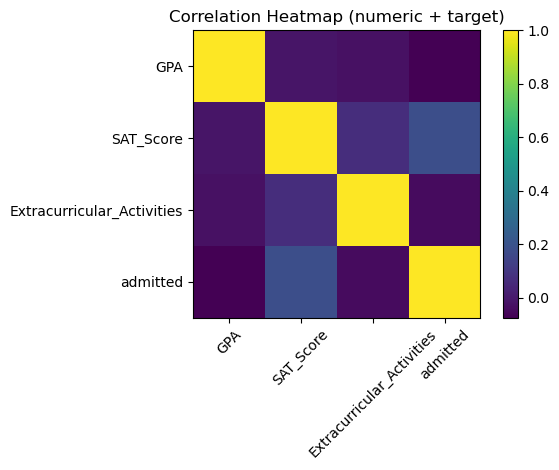

In [7]:
# Correlation heatmap
corr_cols = ['GPA','SAT_Score','Extracurricular_Activities','admitted']
corr = df[corr_cols].corr(numeric_only=True)
plt.figure()
plt.imshow(corr.values, interpolation='nearest')
plt.title('Correlation Heatmap (numeric + target)')
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar()
plt.tight_layout(); plt.show()

In [8]:
# Split + Model
X = df[['GPA','SAT_Score']].copy()
y = df['admitted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
clf = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000))])
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000))])

C:\Users\DuaaHilal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


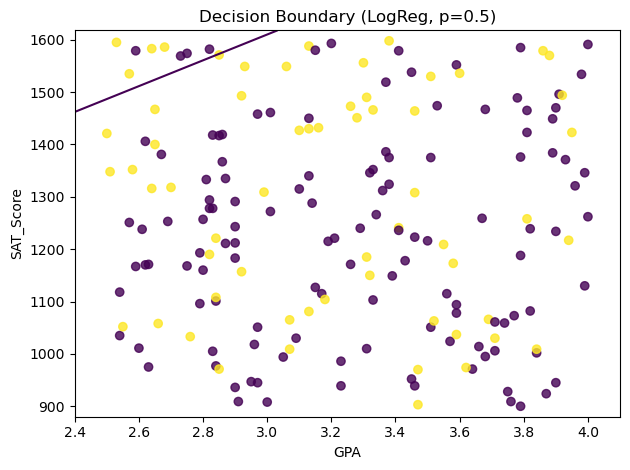

In [9]:
# Decision boundary
gpa_min, gpa_max = X['GPA'].min()-0.1, X['GPA'].max()+0.1
sat_min, sat_max = X['SAT_Score'].min()-20, X['SAT_Score'].max()+20
xx, yy = np.meshgrid(np.linspace(gpa_min, gpa_max, 200), np.linspace(sat_min, sat_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probas = clf.predict_proba(grid)[:,1].reshape(xx.shape)
plt.figure()
plt.contour(xx, yy, probas, levels=[0.5])
plt.scatter(X_train['GPA'], X_train['SAT_Score'], c=y_train, alpha=0.8)
plt.xlabel('GPA'); plt.ylabel('SAT_Score'); plt.title('Decision Boundary (LogReg, p=0.5)')
plt.tight_layout(); plt.show()

In [10]:
# Evaluation
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc, cm

(0.6666666666666666,
 array([[42,  1],
        [20,  0]]))